In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import dateutil.parser as parser
from pandas import Series
from sklearn.datasets import make_blobs
from seaborn import violinplot
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import accuracy_score
from IPython.display import HTML, display
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from math import sin, cos, sqrt, atan2, radians
from sklearn.model_selection import train_test_split  
import folium
import warnings

dataEarthQuake=pd.read_csv("/home/dhialinux/Gomycode/myProduct/databaseEarthquaqe.csv")
dataVolcanos=pd.read_csv("/home/dhialinux/Gomycode/myProduct/databaseVolcanos.csv")

In [2]:
dataVolcanos.describe(include=['O'])

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Dominant Rock Type,Tectonic Setting
count,1508,1508,1508,1508,1507,1508,1455,1501
unique,1478,100,19,33,6,399,11,11
top,Unnamed,United States,South America,Stratovolcano,Eruption Observed,Unknown,Andesite / Basaltic Andesite,Subduction Zone / Continental Crust (>25 km)
freq,23,173,197,597,568,637,578,762


In [3]:
dataEarthQuake.describe(include=['O'])

,Date,Time,Type,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412,23409,23412,23412,23412,23412,23412
unique,12401,20472,4,10,23412,13,48,24,2
top,03/11/2011,14:09:03,Earthquake,MW,USP000GVRT,US,US,US,Reviewed
freq,128,5,23232,7722,1,20630,20350,10458,20773


In [4]:
dataEarthQuake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
dataVolcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [6]:
dataEarthQuake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [7]:
dataVolcanos.columns

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [8]:
dataEarthQuake.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [9]:
dataEarthQuake['Magnitude Error']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
23382      NaN
23383      NaN
23384      NaN
23385      NaN
23386      NaN
23387    0.066
23388      NaN
23389      NaN
23390    0.110
23391      NaN
23392      NaN
23393    0.048
23394      NaN
23395      NaN
23396      NaN
23397      NaN
23398    0.048
23399      NaN
23400      NaN
23401      NaN
23402      NaN
23403      NaN
23404    0.067
23405      NaN
23406    0.350
23407    0.320
23408    0.260
23409      NaN
23410      NaN
23411    0.029
Name: Magnitude Error, Length: 23412, dtype: float64

In [10]:
dataEarthQuake=dataEarthQuake.drop(columns='Magnitude Error',axis=1)

In [11]:
def fig_p(data):
    series=Series(data).value_counts().sort_index()
    series.plot(kind='bar')

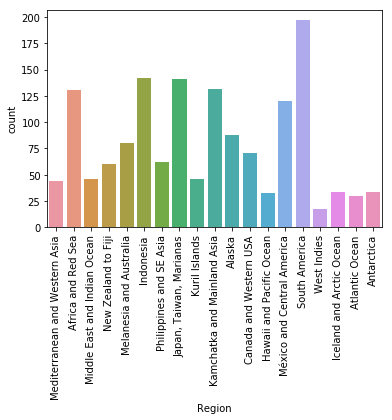

In [12]:
# Count Plot (a.k.a. Bar Plot : categorical variables)
sns.countplot(x='Region', data=dataVolcanos)
 
# Rotate x-labels
plt.xticks(rotation=90)

plt.show()

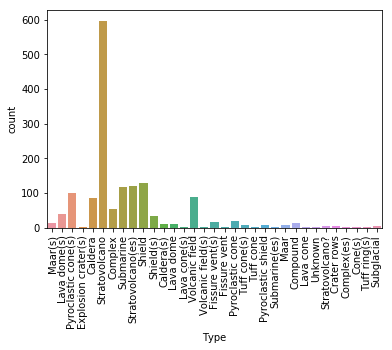

In [13]:
# Count Plot (a.k.a. Bar Plot : categorical variables)
sns.countplot(x='Type', data=dataVolcanos)
 
# Rotate x-labels
plt.xticks(rotation=90)

plt.show()

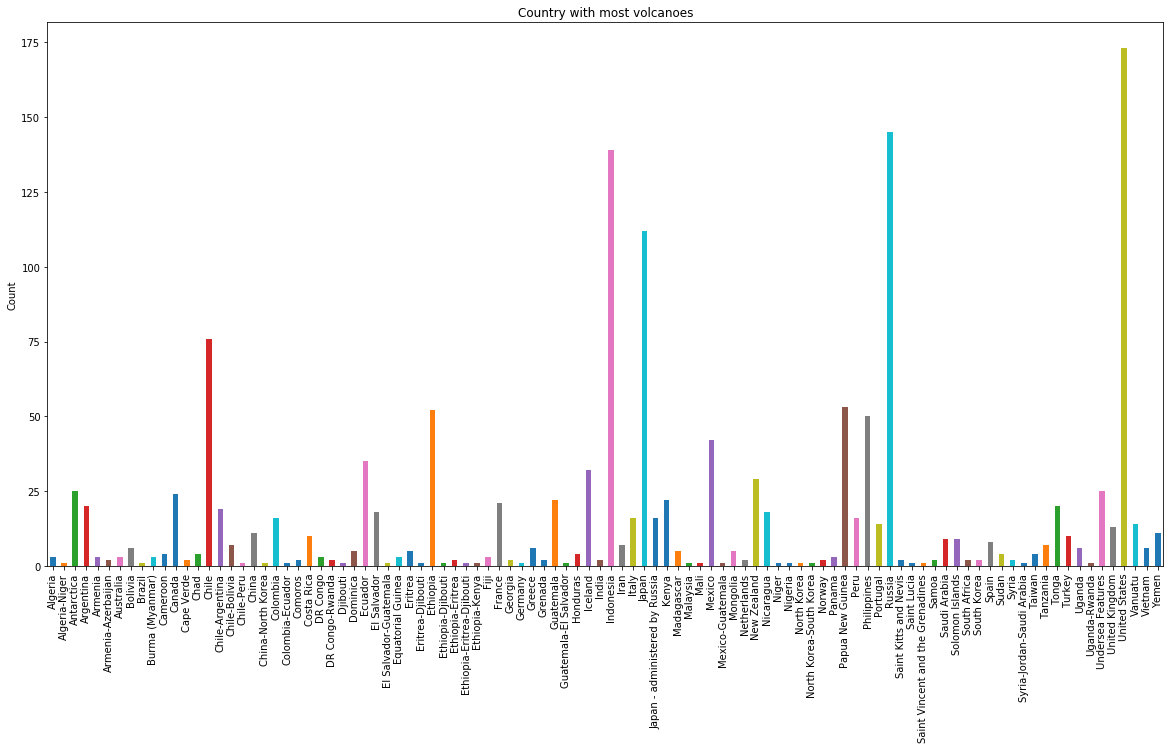

In [14]:
plt.figure(figsize=(20,10))
fig_p(dataVolcanos["Country"])
plt.ylabel("Count")
plt.title("Country with most volcanoes")
plt.show()

In [15]:
dataEarthQuake.drop(columns='Depth Seismic Stations').head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [16]:
dataEarthQuake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


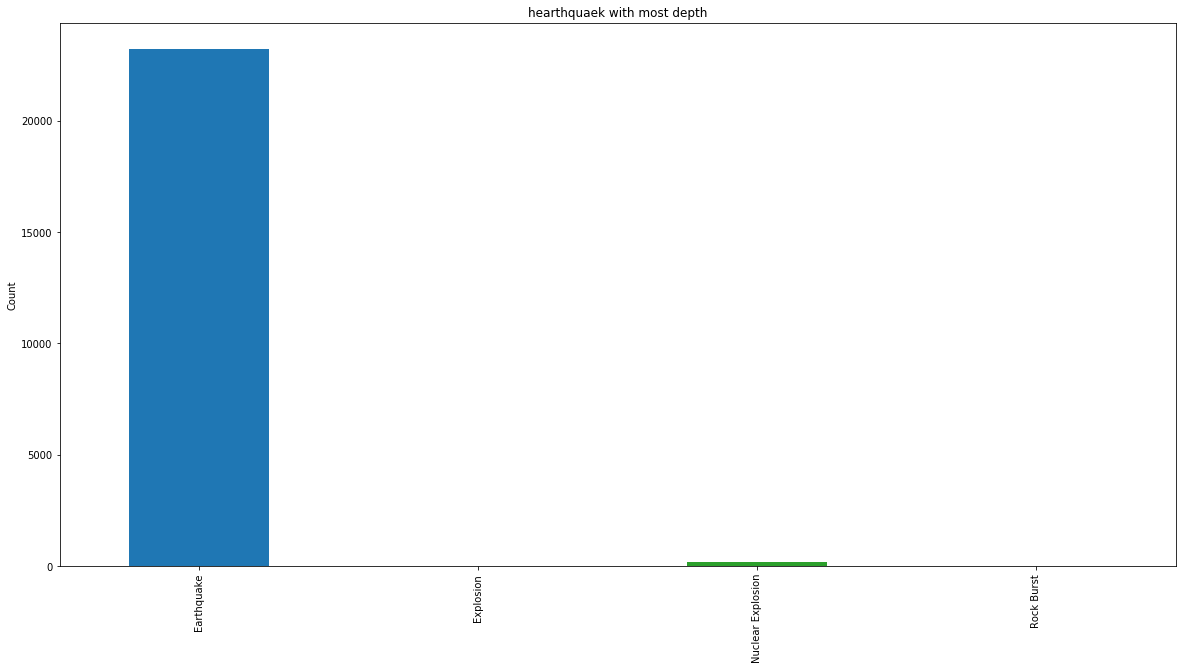

In [17]:
plt.figure(figsize=(20,10))
fig_p(dataEarthQuake["Type"])
plt.ylabel("Count")
plt.title("hearthquaek with most depth")
plt.show()

In [18]:
earthQuake=pd.DataFrame()
earthQuake=dataEarthQuake

/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: M

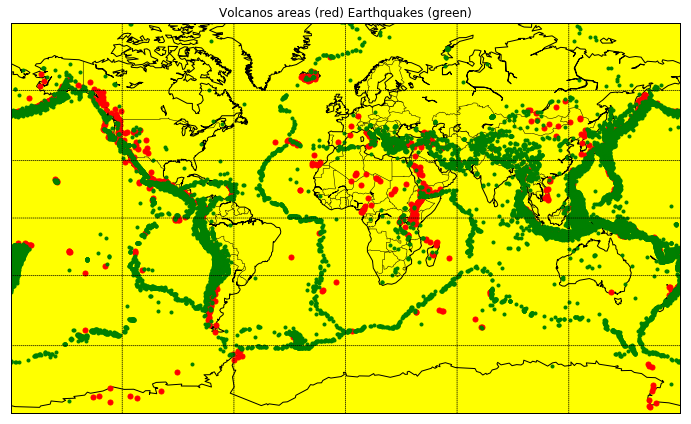

In [19]:
#the earthquakes dataset has nuclear explosions data in it so here i use only the earthquakes information

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(12,10))

longitudes_vol = dataVolcanos["Longitude"].tolist()
latitudes_vol = dataVolcanos["Latitude"].tolist()

longitudes_eq = earthQuake["Longitude"].tolist()
latitudes_eq = earthQuake["Latitude"].tolist()

x,y = m(longitudes_vol,latitudes_vol)
a,b= m(longitudes_eq,latitudes_eq)

plt.title("Volcanos areas (red) Earthquakes (green)")
m.plot(x, y, "o", markersize = 5, color = 'red')
m.plot(a, b, "o", markersize = 3, color = 'green')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='yellow')
plt.show()

#division of long&lat
def division(data):
    north_n=sum(data["Latitude"] >=30)
    middle_n=sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south_n=sum(data["Latitude"]<= -30)
    #precentage
    total=north_n+middle_n+south_n
    north_p=north_n/total*100
    middle_p=middle_n/total*100
    south_p=south_n/total*100
    return north_n,middle_n,south_n,north_p,middle_p,south_p

volc=division(dataVolcanos)
eq=division(dataEarthQuake)


/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


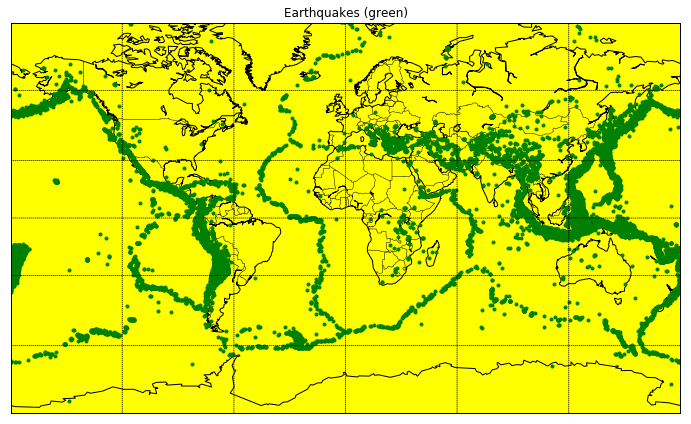

In [20]:
#the earthquakes dataset has nuclear explosions data in it so here i use only the earthquakes information
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(12,10))


longitudes_eq = earthQuake["Longitude"].tolist()
latitudes_eq = earthQuake["Latitude"].tolist()

a,b= m(longitudes_eq,latitudes_eq)

plt.title("Earthquakes (green)")
m.plot(a, b, "o", markersize = 3, color = 'green')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='yellow')
plt.show()

#division of long&lat
def division(data):
    north_n=sum(data["Latitude"] >=30)
    middle_n=sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south_n=sum(data["Latitude"]<= -30)
    #precentage
    total=north_n+middle_n+south_n
    north_p=north_n/total*100
    middle_p=middle_n/total*100
    south_p=south_n/total*100
    return north_n,middle_n,south_n,north_p,middle_p,south_p

eq=division(dataEarthQuake)


/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


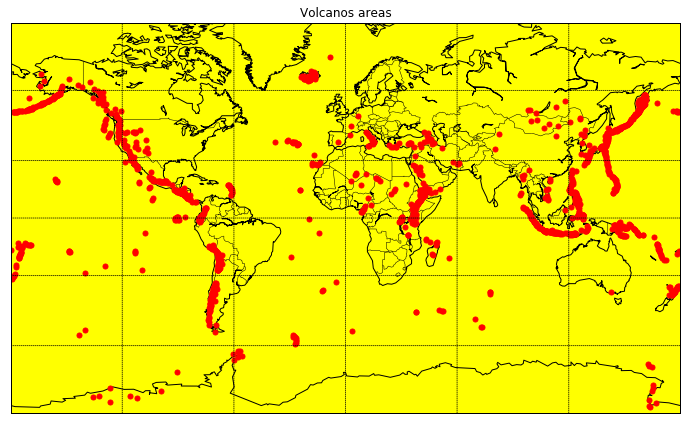

In [21]:
#the earthquakes dataset has nuclear explosions data in it so here i use only the earthquakes information
earthQuakes=pd.DataFrame()

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(12,10))

longitudes_vol = dataVolcanos["Longitude"].tolist()
latitudes_vol = dataVolcanos["Latitude"].tolist()

x,y = m(longitudes_vol,latitudes_vol)

plt.title("Volcanos areas")
m.plot(x, y, "o", markersize = 5, color = 'red')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='yellow')
plt.show()

#division of long&lat
def division(data):
    north_n=sum(data["Latitude"] >=30)
    middle_n=sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south_n=sum(data["Latitude"]<= -30)
    #precentage
    total=north_n+middle_n+south_n
    north_p=north_n/total*100
    middle_p=middle_n/total*100
    south_p=south_n/total*100
    return north_n,middle_n,south_n,north_p,middle_p,south_p

volc=division(dataVolcanos)

/home/dhialinux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matpl

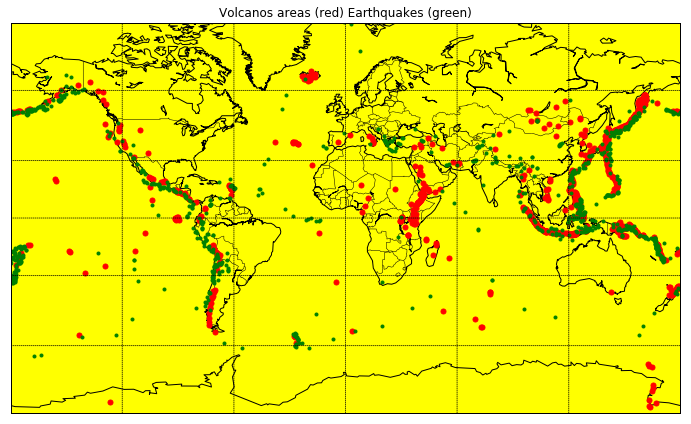

In [22]:
#the earthquakes dataset has nuclear explosions data in it so here i use only the earthquakes information
earthQuake=pd.DataFrame()
volcanos=pd.DataFrame()
earthQuake=dataEarthQuake[(dataEarthQuake.Type=='Earthquake') & (dataVolcanos.Longitude-dataEarthQuake.Longitude >-100.0) & (dataVolcanos.Latitude-dataEarthQuake.Latitude <=100.0)]
volcanos=dataVolcanos[(dataVolcanos.Longitude-dataEarthQuake.Longitude >-100.0) & (dataVolcanos.Latitude-dataEarthQuake.Latitude <=100.0)]
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(12,10))

longitudes_vol = volcanos["Longitude"].tolist()
latitudes_vol = volcanos["Latitude"].tolist()

longitudes_eq = earthQuake["Longitude"].tolist()
latitudes_eq = earthQuake["Latitude"].tolist()

x,y = m(longitudes_vol,latitudes_vol)
a,b= m(longitudes_eq,latitudes_eq)

plt.title("Volcanos areas (red) Earthquakes (green)")
m.plot(x, y, "o", markersize = 5, color = 'red')
m.plot(a, b, "o", markersize = 3, color = 'green')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='yellow')
plt.show()

#division of long&lat
def division(data):
    north_n=sum(data["Latitude"] >=30)
    middle_n=sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south_n=sum(data["Latitude"]<= -30)
    #precentage
    total=north_n+middle_n+south_n
    north_p=north_n/total*100
    middle_p=middle_n/total*100
    south_p=south_n/total*100
    return north_n,middle_n,south_n,north_p,middle_p,south_p

volc=division(dataVolcanos)
eq=division(dataEarthQuake)


In [23]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
6,211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.730,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944 CE,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km)
10,211031,Palinuro,Italy,Mediterranean and Western Asia,Submarine,Eruption Dated,8040 BCE,39.480,14.830,-70,Phonolite,Subduction Zone / Continental Crust (>25 km)


In [24]:
earthQuake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
10,01/17/1965,20:57:41,-6.807,108.988,Earthquake,227.9,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM861155,ISCGEM,ISCGEM,ISCGEM,Automatic


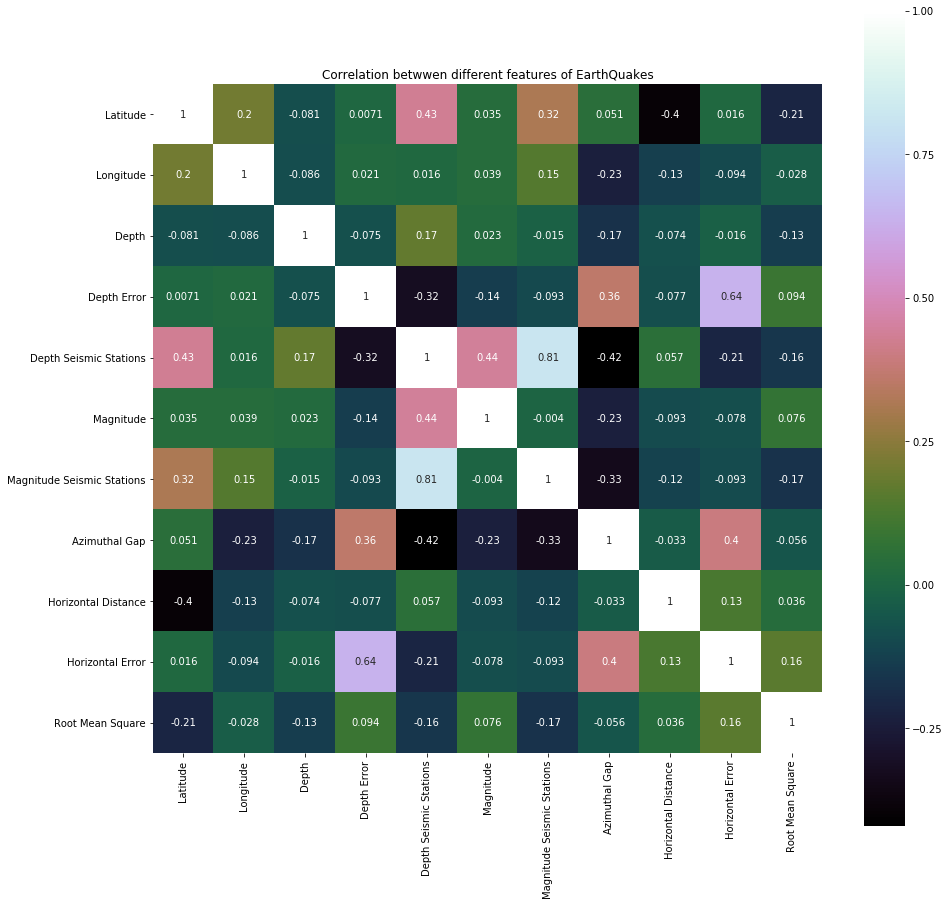

In [25]:
correlation = dataEarthQuake.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation betwwen different features of EarthQuakes')
plt.show()

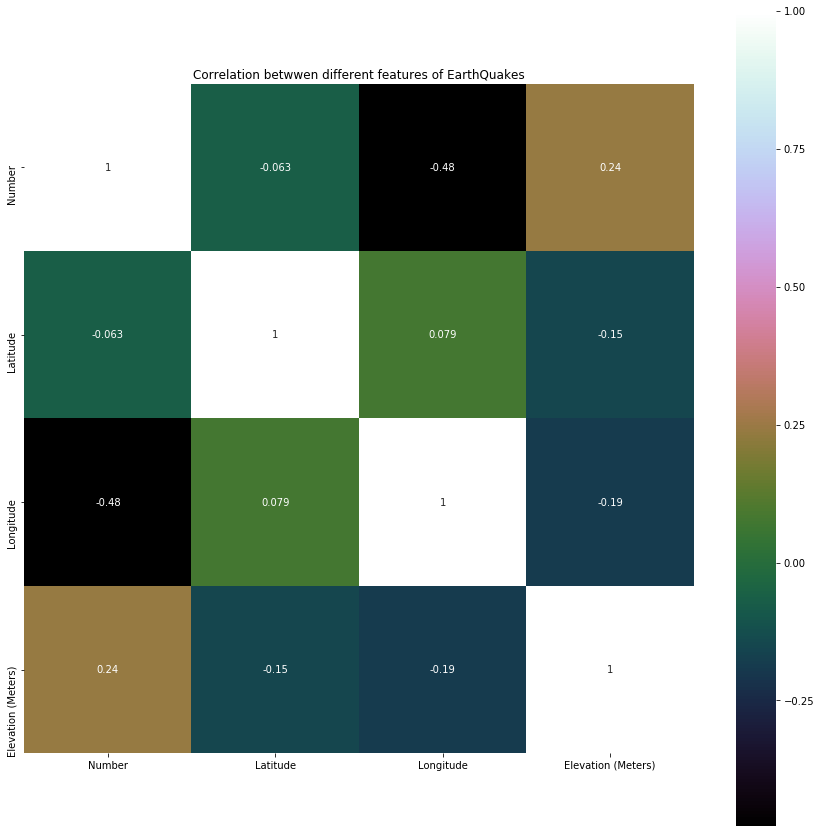

In [26]:
correlation = dataVolcanos.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation betwwen different features of EarthQuakes')
plt.show()

/home/dhialinux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dhialinux/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matpl

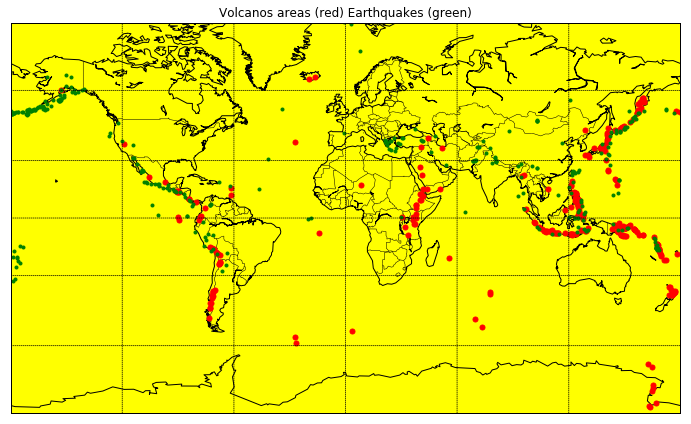

In [27]:
#the earthquakes dataset has nuclear explosions data in it so here i use only the earthquakes information
earthQuake=pd.DataFrame()
volcanos=pd.DataFrame()
earthQuake=dataEarthQuake[(dataEarthQuake.Type=='Earthquake') & (dataVolcanos.Longitude-dataEarthQuake.Longitude >-9.0) & (dataVolcanos.Latitude-dataEarthQuake.Latitude <=9.0)]
volcanos=dataVolcanos[(dataVolcanos.Longitude-dataEarthQuake.Longitude >-9.0) & (dataVolcanos.Latitude-dataEarthQuake.Latitude <=9.0) & (dataVolcanos.Type != "Submarine")]
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(12,10))

longitudes_vol = volcanos["Longitude"].tolist()
latitudes_vol = volcanos["Latitude"].tolist()

longitudes_eq = earthQuake["Longitude"].tolist()
latitudes_eq = earthQuake["Latitude"].tolist()

x,y = m(longitudes_vol,latitudes_vol)
a,b= m(longitudes_eq,latitudes_eq)

plt.title("Volcanos areas (red) Earthquakes (green)")
m.plot(x, y, "o", markersize = 5, color = 'red')
m.plot(a, b, "o", markersize = 3, color = 'green')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='yellow')
plt.show()

#division of long&lat
def division(data):
    north_n=sum(data["Latitude"] >=30)
    middle_n=sum(np.logical_and(data["Latitude"]<30, data["Latitude"]>-30))
    south_n=sum(data["Latitude"]<= -30)
    #precentage
    total=north_n+middle_n+south_n
    north_p=north_n/total*100
    middle_p=middle_n/total*100
    south_p=south_n/total*100
    return north_n,middle_n,south_n,north_p,middle_p,south_p

volc=division(dataVolcanos)
eq=division(dataEarthQuake)


In [28]:
testData=pd.DataFrame()
testDataVol=pd.DataFrame()
testDataEq=pd.DataFrame()
testDataVol['LongitudeVol']=volcanos.Longitude
testDataVol['LatitudeVol']=volcanos.Latitude
testDataVol['Elevation (Meters)']=volcanos['Elevation (Meters)']
testDataVol['TypeVol']=volcanos['Type']

testDataEq['LongitudeEq']=earthQuake.Longitude
testDataEq['LatitudeEq']=earthQuake.Latitude
testDataEq['YearEarthEq']=earthQuake.Date.map(lambda data: parser.parse(data).year)
testDataEq['Magnitude']=earthQuake['Magnitude']
testDataEq['DepthEq']=earthQuake['Depth']
testDataEq['Type']=earthQuake['Type']

testData['LongitudeVol']=volcanos.Longitude
testData['LatitudeVol']=volcanos.Latitude
testData['Elevation (Meters)']=volcanos['Elevation (Meters)']
testData['LastEruption']=volcanos['Last Known Eruption']
testData['TypeVol']=volcanos.Type

testData['LongitudeEq']=earthQuake.Longitude
testData['LatitudeEq']=earthQuake.Latitude
testData['YearEarthEq']=earthQuake.Date.map(lambda data: parser.parse(data).year)
testData['Magnitude']=earthQuake['Magnitude']
testData['DepthEq']=earthQuake['Depth']


In [29]:
testData.head()

,LongitudeVol,LatitudeVol,Elevation (Meters),LastEruption,TypeVol,LongitudeEq,LatitudeEq,YearEarthEq,Magnitude,DepthEq
39,44.200,40.530,4095,Unknown,Stratovolcano,-162.008,53.008,1965.0,6.4,17.8
44,41.830,15.550,244,2008 CE,Stratovolcano,-161.859,53.191,1965.0,6.3,22.5
65,40.853,13.088,1250,Unknown,Stratovolcano,-72.971,6.746,1965.0,5.6,160.0
66,40.185,13.013,1745,Unknown,Stratovolcano,-112.208,28.133,1965.0,6.0,10.0
72,41.208,11.880,625,Unknown,Shield,-92.623,15.404,1965.0,5.6,105.2


In [30]:
testDataEq.head()

,LongitudeEq,LatitudeEq,YearEarthEq,Magnitude,DepthEq,Type
39,-162.008,53.008,1965,6.4,17.8,Earthquake
44,-161.859,53.191,1965,6.3,22.5,Earthquake
65,-72.971,6.746,1965,5.6,160.0,Earthquake
66,-112.208,28.133,1965,6.0,10.0,Earthquake
72,-92.623,15.404,1965,5.6,105.2,Earthquake


In [31]:
X = testDataVol.iloc[:, :-1].values  
y = testDataVol.iloc[:,3].values  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [33]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  



In [34]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_pred = classifier.predict(X_test) 


In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  



[[ 2  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 3  2  0  0  2  0  0  1  1 21  1  0  0]
 [ 1  1  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  2  1  0  1]]
                     precision    recall  f1-score   support

            Caldera       0.17      0.67      0.27         3
            Complex       0.00      0.00      0.00         2
           Compound       0.00      0.00      0.00         1
       Fissure vent       0.00      0.00      0.00         1
          Lava cone       0.00      0.00      0.00         0
       Lava dome(s)       0.00      0.00      0.00         0
Pyroclastic cone(s)      

/home/dhialinux/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [37]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0,0.5,'Mean Error')

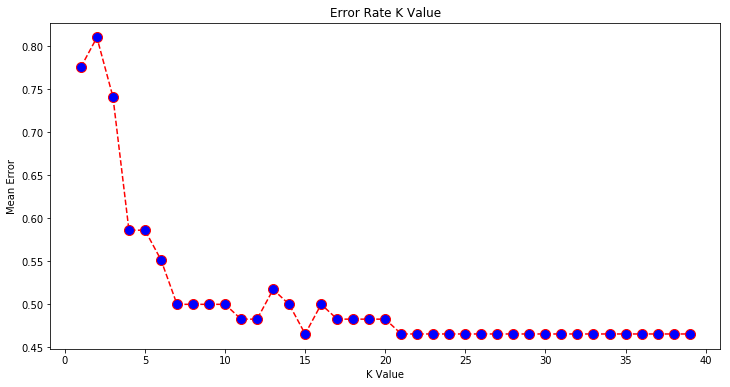

In [38]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  


In [39]:
df_vol = testData.loc[:, ("LatitudeVol", "LongitudeVol")]
df_Eq = testData.loc[:,('LatitudeEq','LongitudeEq')]

In [40]:
df_vol['LatitudeVol'] = df_vol['LatitudeVol'].apply(lambda x: round(x,2))
df_vol['LatitudeVol'] = df_vol['LatitudeVol'].apply(lambda x: round(x,2))
df_Eq['LatitudeEq'] = df_Eq['LatitudeEq'].apply(lambda x: round(x,2))
df_Eq['LongitudeEq'] = df_Eq['LongitudeEq'].apply(lambda x: round(x,2))
df_Vol_List=df_vol.values.tolist()
df_Eq_List=df_Eq.values.tolist()
map1 = folium.Map(location = [20,0], tiles = "Stamen Terrain")
df_Vol_List

[[40.53, 44.2],
 [15.55, 41.83],
 [13.09, 40.853],
 [13.01, 40.185],
 [11.88, 41.208],
 [11.63, 41.45],
 [9.78, 40.33],
 [9.57, 40.28],
 [7.07, 38.1],
 [6.78, 37.83],
 [5.65, 37.67],
 [2.32, 37.97],
 [0.62, 36.075],
 [0.23, 37.87],
 [-1.15, 36.357],
 [-3.07, 37.35],
 [-3.25, 36.75],
 [-4.89, 31.933000000000003],
 [-9.13, 33.668],
 [0.7, 30.25],
 [17.68, 8.5],
 [36.53, 40.85],
 [26.58, 40.2],
 [22.8, 41.38],
 [15.63, 44.08],
 [15.55, 50.63],
 [35.95, 52.108999999999995],
 [-21.24, 55.708],
 [-37.83, 77.52],
 [-38.72, 77.53],
 [-53.11, 73.513],
 [-49.58, 69.5],
 [-35.3, 173.9],
 [-35.75, 174.27],
 [-36.9, 174.87],
 [-37.28, 176.25],
 [-39.3, 174.07],
 [-37.52, 177.18],
 [-38.12, 176.5],
 [-38.42, 176.33],
 [-38.42, 176.08],
 [-38.82, 176.0],
 [-39.16, 175.632],
 [-39.28, 175.57],
 [-37.86, 176.98],
 [-38.08, 176.27],
 [-19.12, 177.98],
 [-2.57, 147.28],
 [-3.61, 144.588],
 [-3.99, 144.963],
 [-4.08, 145.037],
 [-5.36, 147.12],
 [-5.59, 147.875],
 [-5.41, 148.094],
 [-4.63, 149.35],
 [-4.

In [41]:
df_year = volcanos.loc[:, ("Last Known Eruption")].values.tolist()
df_name = volcanos.loc[:, ("Name")].values.tolist()
df_country = volcanos.loc[:, ("Country")].values.tolist()
df_type = volcanos.loc[:, ("Type")].values.tolist()


In [42]:
map1.save('Gomycode/volcanos.html')

In [43]:
i = 0
for coordinates in df_Vol_List :

#assign a color marker for the type of volcano, Strato being the most common
    
    type_color = "black"
    map1.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(df_year[i]) + '<br>' +
                            "Name: " + str(df_name[i]) + '<br>' +
                            "Country: " + str(df_country[i]) + '<br>'
                            "Type: " + str(df_type[i]) + '<br>'
                            "Coordinates: " + str(df_Vol_List[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1



In [44]:
map1

In [45]:
def distance(lat1, lon1, lat2, lon2, unit = 'k') :
        earth_radius = 6378137
        #Terre = sphère de 6378km de rayon
       
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        
        distance = R * c

        return distance
    

In [46]:
listDist={}


In [47]:
testDataVol['Country']=volcanos['Country']
X = testDataVol.iloc[:, :-2].values  
y = testDataVol.iloc[:,4].values  

In [48]:
y

array(['Armenia', 'Yemen', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia',
       'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Kenya',
       'Kenya', 'Kenya', 'Kenya', 'Tanzania', 'Tanzania', 'Tanzania',
       'Tanzania', 'Uganda', 'Niger', 'Syria', 'Saudi Arabia',
       'Saudi Arabia', 'Yemen', 'Yemen', 'Iran', 'France', 'France',
       'France', 'Australia', 'France', 'New Zealand', 'New Zealand',
       'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand',
       'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand',
       'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'Fiji',
       'Papua New Guinea', 'Papua New Guinea', 'Papua New Guinea',
       'Papua New Guinea', 'Papua New Guinea', 'Papua New Guinea',
       'Papua New Guinea', 'Papua New Guinea', 'Papua New Guinea',
       'Papua New Guinea', 'Papua New Guinea', 'Papua New Guinea',
       'Papua New Guinea', 'Papua New Guinea', 'Papua New Guinea',
       'Papua New Guinea', 'Papua

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [50]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  



In [51]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_pred = classifier.predict(X_test) 

In [53]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  



[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

/home/dhialinux/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dhialinux/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [54]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0,0.5,'Mean Error')

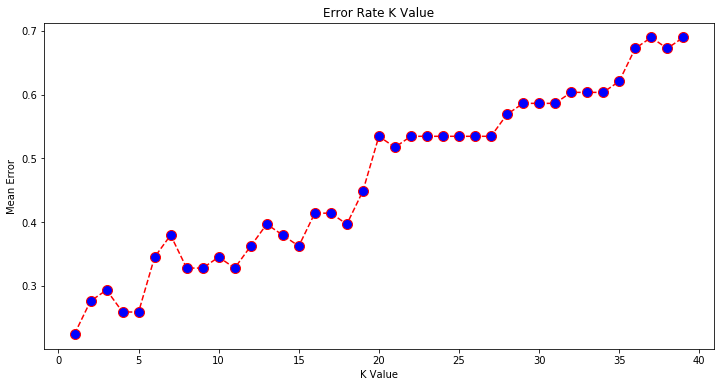

In [55]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
